In [127]:
from littlefish.visulization import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [128]:
simulation_folder = r"F:\little_fish_simulation_logs_8eyes_no_hidden"
min_generation = 30
max_generation = 47

population_size = 1000
turnover_rate = 0.6

mother_fish_num = int(population_size * (1 - turnover_rate))

In [129]:
life_span_df = plotting.collect_life_spans(
    simulation_folder,
    min_generation=min_generation,  # 0
    max_generation=max_generation,  # 25
)

reading generation_0000030, 1 / 18 ...
reading generation_0000031, 2 / 18 ...
reading generation_0000032, 3 / 18 ...
reading generation_0000033, 4 / 18 ...
reading generation_0000034, 5 / 18 ...
reading generation_0000035, 6 / 18 ...
reading generation_0000036, 7 / 18 ...
reading generation_0000037, 8 / 18 ...
reading generation_0000038, 9 / 18 ...
reading generation_0000039, 10 / 18 ...
reading generation_0000040, 11 / 18 ...
reading generation_0000041, 12 / 18 ...
reading generation_0000042, 13 / 18 ...
reading generation_0000043, 14 / 18 ...
reading generation_0000044, 15 / 18 ...
reading generation_0000045, 16 / 18 ...
reading generation_0000046, 17 / 18 ...
reading generation_0000047, 18 / 18 ...


In [130]:
life_span_df.sort_values(by="life_span")

,generation,fish_name,life_span,is_from_last_geneartion
14574,44,fish_241216_10_55_23.905546,48.333333,False
10160,40,fish_241216_09_01_23.702202,55.000000,False
14286,44,fish_241216_10_55_14.032455,59.666667,False
3636,33,fish_241216_05_30_51.141979,65.666667,False
12821,42,fish_241216_10_02_14.226556,66.000000,False
...,...,...,...,...
16489,46,fish_241216_11_59_19.031433,7028.000000,False
17086,47,fish_241216_11_59_33.326432,7076.333333,True
4488,34,fish_241216_05_59_50.604208,7410.666667,False
15980,45,fish_241216_11_25_23.866967,7566.000000,False


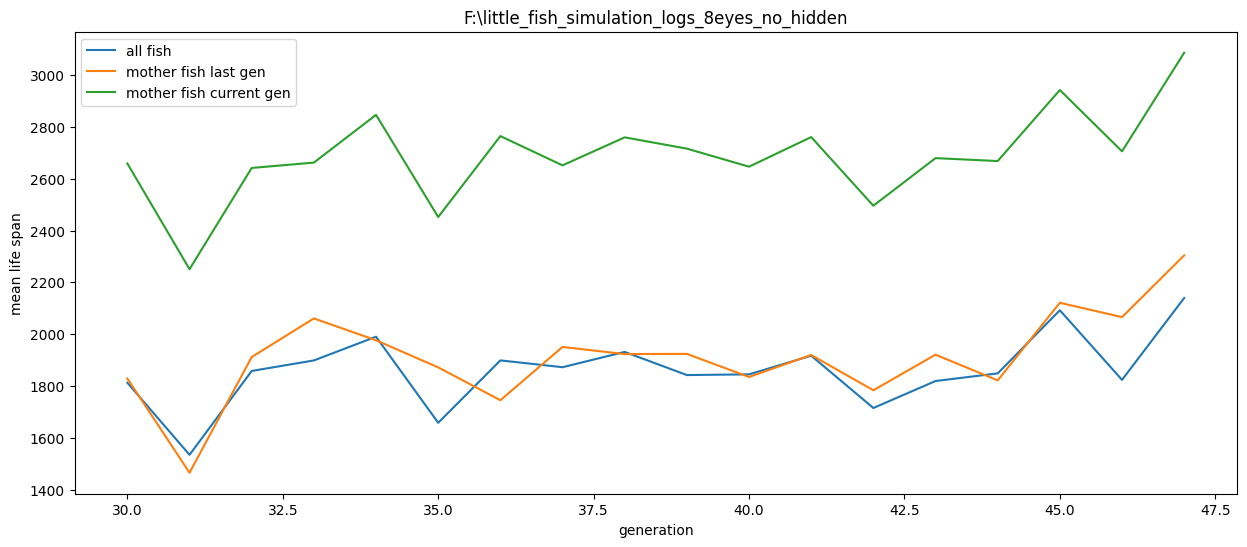

In [131]:
gens = sorted(life_span_df["generation"].unique())
mean_life_span = []
mean_mo_life_last_gen = []
mean_mo_life_curr_gen = []
for gen in gens:
    curr_life_span = sorted(life_span_df.query("generation == @gen")["life_span"])
    mean_life_span.append(np.mean(curr_life_span))
    mean_mo_life_last_gen.append(np.mean(life_span_df.query("generation == @gen and is_from_last_geneartion")["life_span"]))
    mean_mo_life_curr_gen.append(np.mean(curr_life_span[-mother_fish_num:]))

f, ax = plt.subplots(figsize=(15, 6))
ax.plot(gens, mean_life_span, label="all fish")
ax.plot(gens, mean_mo_life_last_gen, label="mother fish last gen")
ax.plot(gens, mean_mo_life_curr_gen, label="mother fish current gen")
ax.set_xlabel("generation")
ax.set_ylabel("mean life span")
ax.set_title(simulation_folder)
ax.legend()

(0.0, 10000.0)

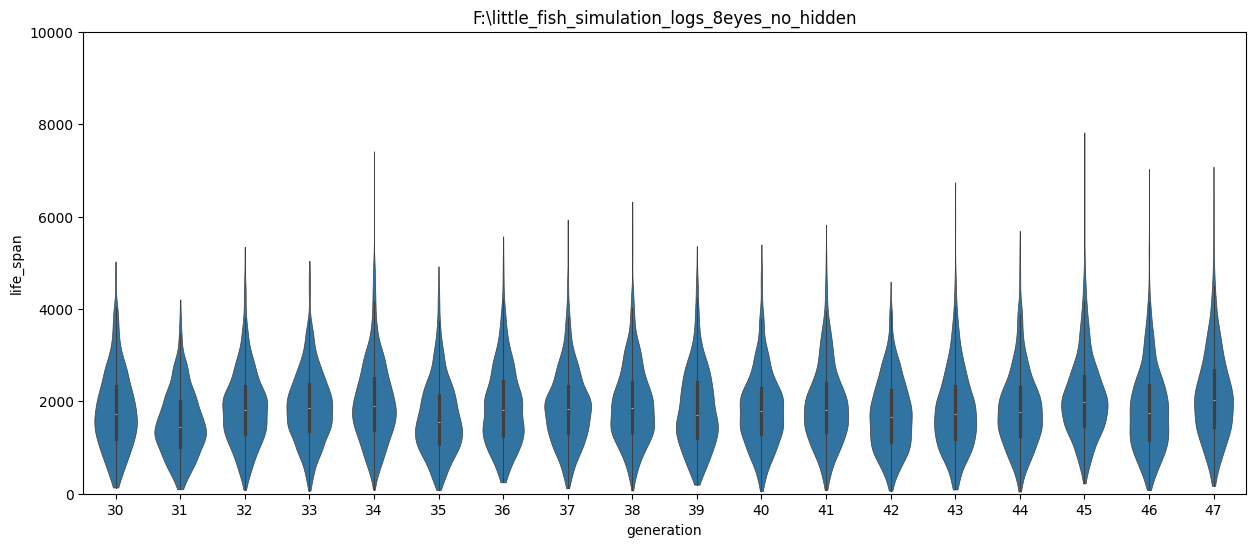

In [132]:
f, ax = plt.subplots(figsize=(15, 6))
ax.set_title(simulation_folder)
sns.violinplot(
    data=life_span_df, x="generation", y="life_span", ax=ax, cut=0, linewidth=0.5,
)
ax.set_ylim([0, 10000])

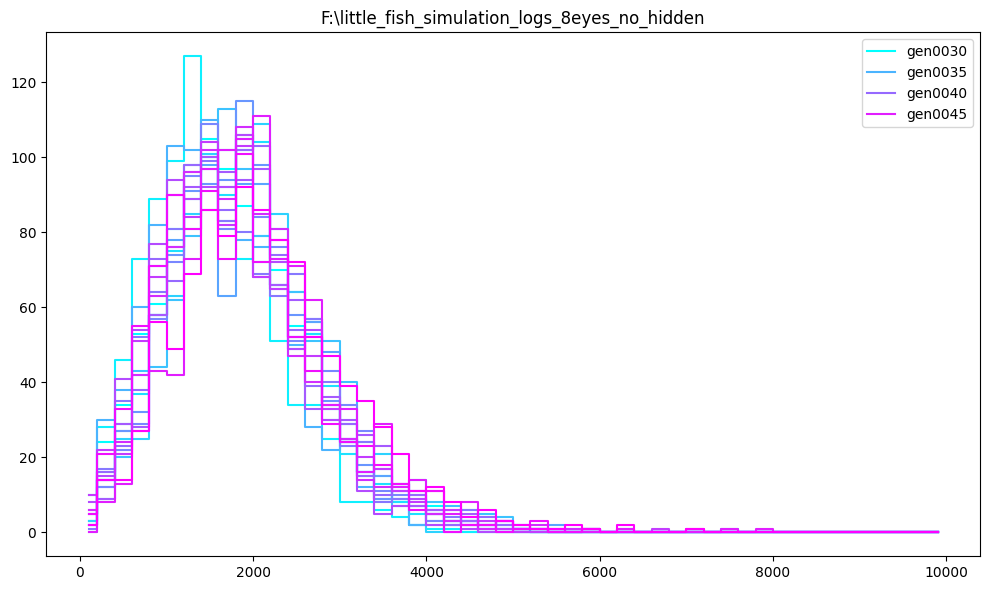

In [133]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_title(simulation_folder)
plotting.plot_simulation_life_spans(
    life_span_df, ax, max_life_span=10000, bins=50, legend_gap=5, 
)
ax.legend()
plt.tight_layout()